A Real Example of Linear Regression


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy 
import seaborn as sns



Data Cleaning

In [3]:
data = pd.read_csv('communities_cleaned.csv')
data.head

data = data.drop('Unnamed: 0', axis=1)
data.head()


,state,county,community,communityname,fold,population,householdsize,agePct12t21,agePct12t29,agePct16t24,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,36,1,1000,Albanycity,1,0.15,0.31,0.58,0.72,0.65,...,0.06,0.39,0.84,0.06,0.06,0.91,0.5,0.88,0.26,0.49
1,19,193,93926,SiouxCitycity,1,0.11,0.43,0.45,0.48,0.31,...,0.16,0.12,0.07,0.04,0.01,0.81,1.0,0.56,0.09,0.63
2,51,680,47672,Lynchburgcity,1,0.09,0.43,0.58,0.56,0.50,...,0.14,0.11,0.19,0.05,0.01,0.75,0.0,0.60,0.10,0.31
3,34,23,58200,PerthAmboycity,1,0.05,0.59,0.45,0.55,0.37,...,0.01,0.73,0.28,0.00,0.02,0.64,0.0,1.00,0.23,0.50
4,9,9,46520,Meridentown,1,0.08,0.39,0.33,0.48,0.27,...,0.07,0.21,0.04,0.02,0.01,0.70,1.0,0.44,0.11,0.14


In [1]:
# for column in data.columns:
#     print(column)
    

In [8]:
data['PctHomeless'] = (data['NumInShelters'] + data['NumStreet']) / data['population']

In [10]:
data = data.drop([x for x in data.columns if x.startswith('num') or x.startswith('Num')], axis=1)

In [11]:
data.shape 

(123, 112)

In [23]:
#whats Y?
target_str = "ViolentCrimesPerPop"

Columns are broekn down into:

    1. Education
    2. Wealth 
    3. Martial/Family 
    4. Housing 
    5. Policing
    6. Other factoers(Homelessness, Density, Urban/Rural)

Ahead of time, we can expect a lot of multicollinearity. 

In [16]:
# for col in data.columns:
#     print(col)

Exploraotry Analysis

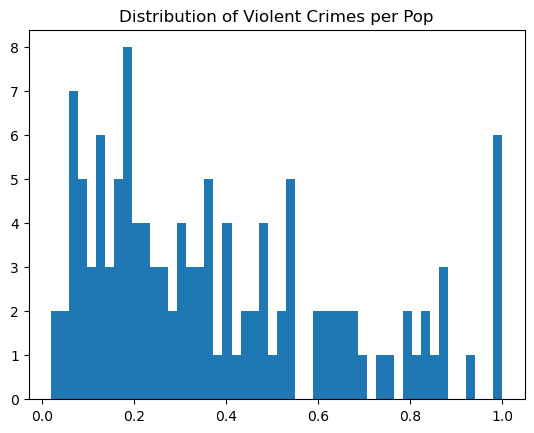

In [25]:
plt.hist(data['ViolentCrimesPerPop'], bins=50)
plt.title("Distribution of Violent Crimes per Pop")
plt.show()

In [70]:
def create_corrmap(interest_cols, title='Corrmap title not given', figsize=(10, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(data[interest_cols + [target_str]].corr(), vmin=-1, vmax=1, annot=True, ax=ax)
    plt.title(title)
    plt.show()

    

In [27]:
print(data.columns)


Index(['state', 'county', 'community', 'communityname', 'fold', 'population',
       'householdsize', 'agePct12t21', 'agePct12t29', 'agePct16t24',
       ...
       'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
       'PolicBudgPerPop', 'ViolentCrimesPerPop', 'PctHomeless'],
      dtype='object', length=112)


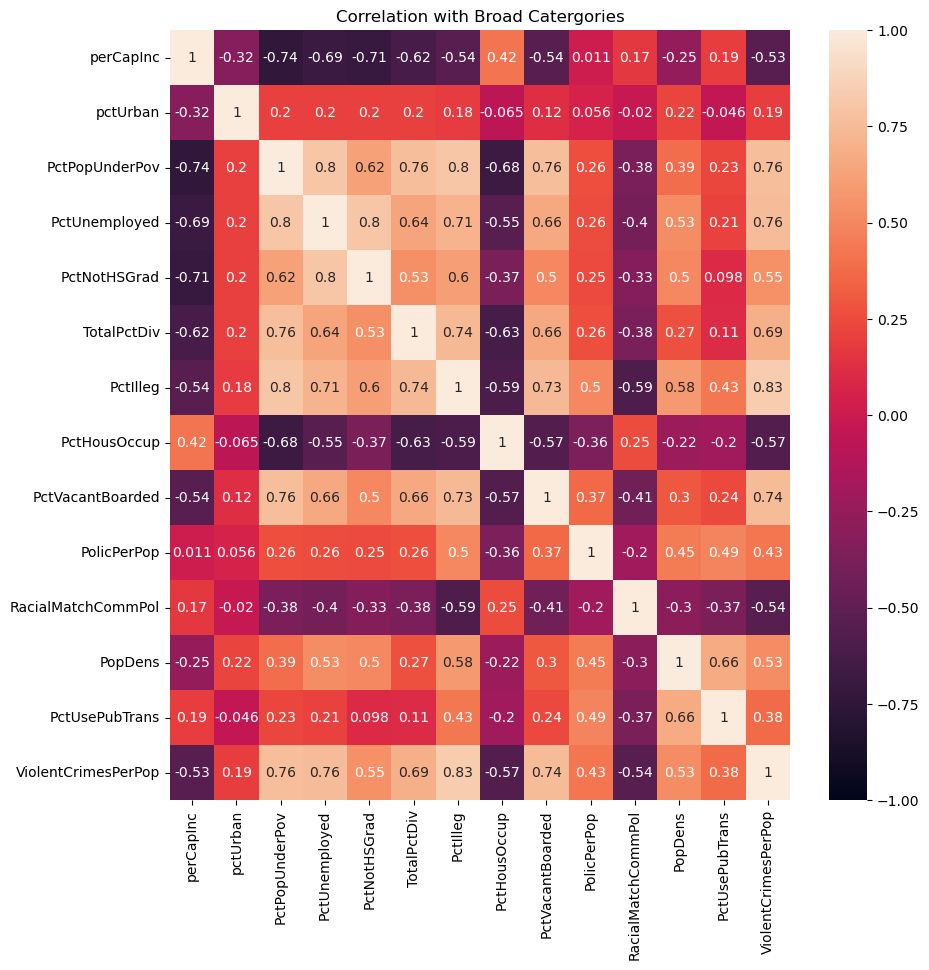

In [71]:
cols_interest  = ['perCapInc', 'pctUrban', 'PctPopUnderPov', 'PctUnemployed', 'PctNotHSGrad', 'TotalPctDiv', 
                  'PctIlleg', 'PctHousOccup', 'PctVacantBoarded', 'PolicPerPop', 'RacialMatchCommPol', 'PopDens',
                  'PctUsePubTrans']


create_corrmap(cols_interest, title = 'Correlation with Broad Catergories') 

In [35]:
def plot_reg_and_hist(features, target):
    
    for feature in features: 
        fig, ax = plt.subplots(1, 2, figsize=(10, 4))
        sns.regplot(data=data, x=feature, y=target_str, ax=ax[0])
        ax[1].hist(data[feature])  
        ax[0].set_title(f"Regression plot of violent crimes vs {feature}")
        ax[1].set_title(f"Histogram of {feature}")  
        plt.show()  
            

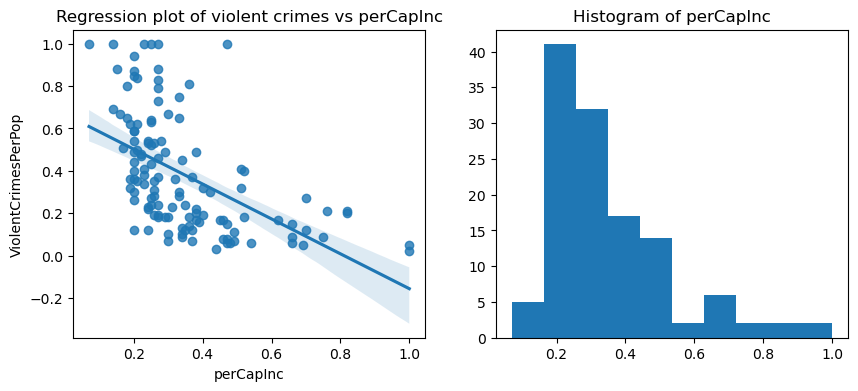

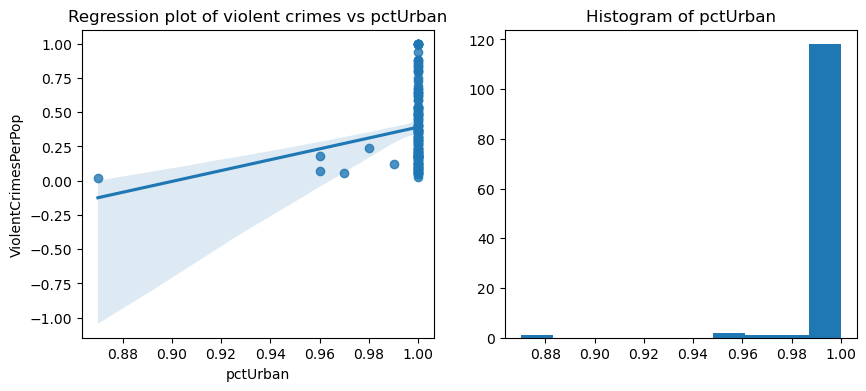

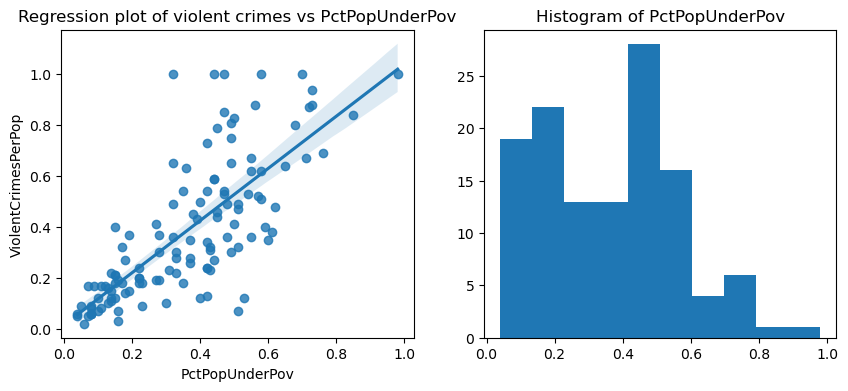

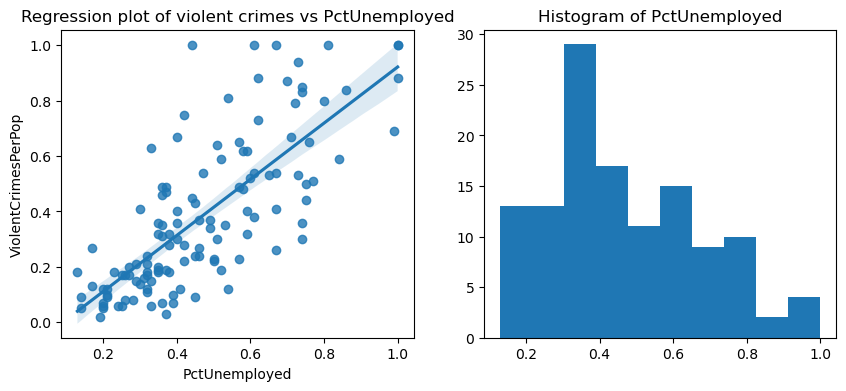

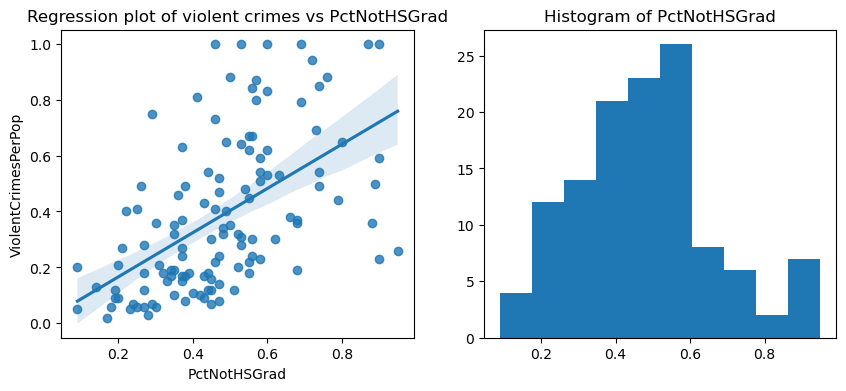

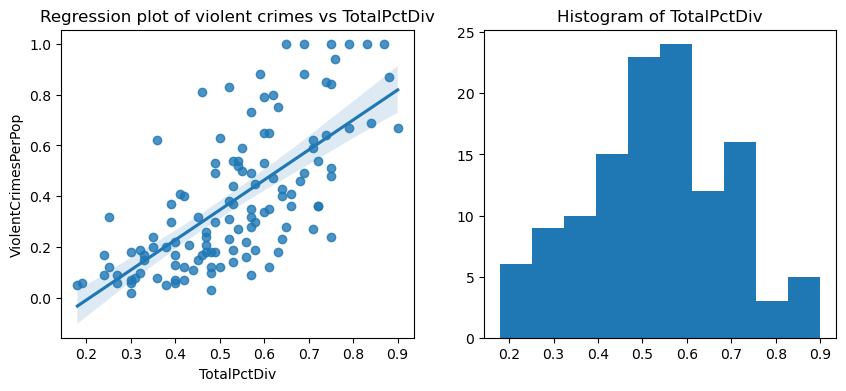

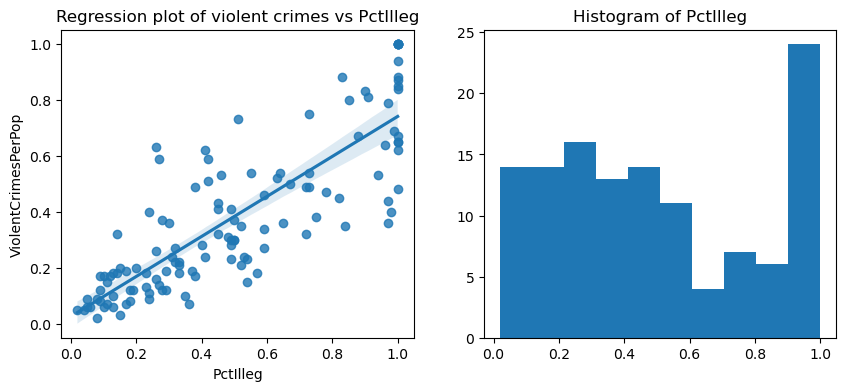

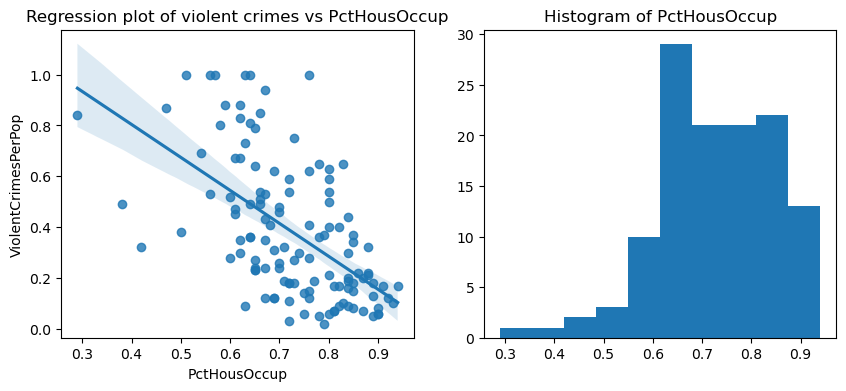

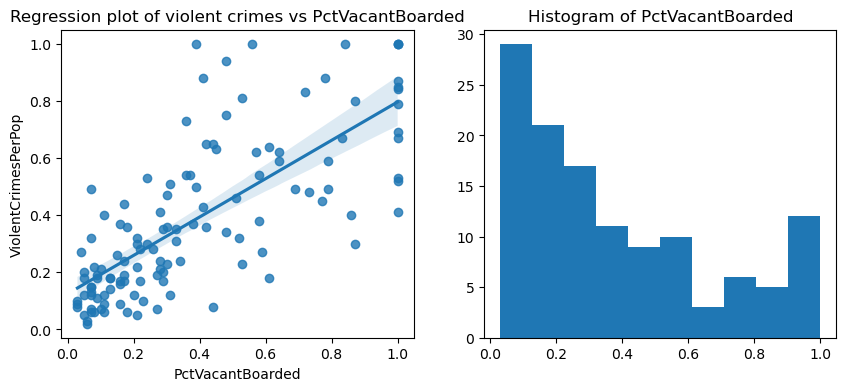

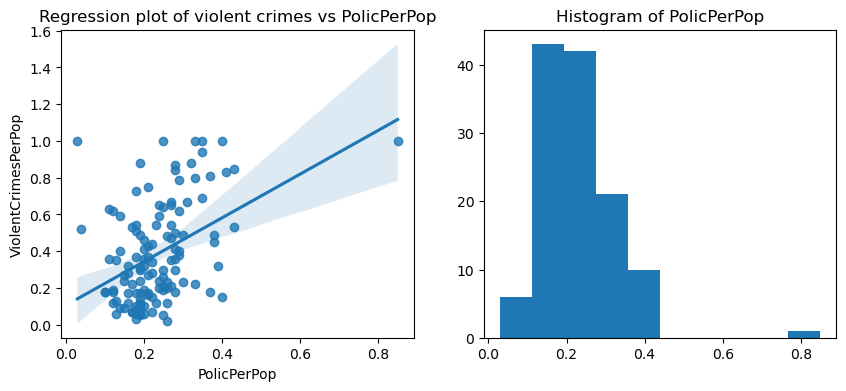

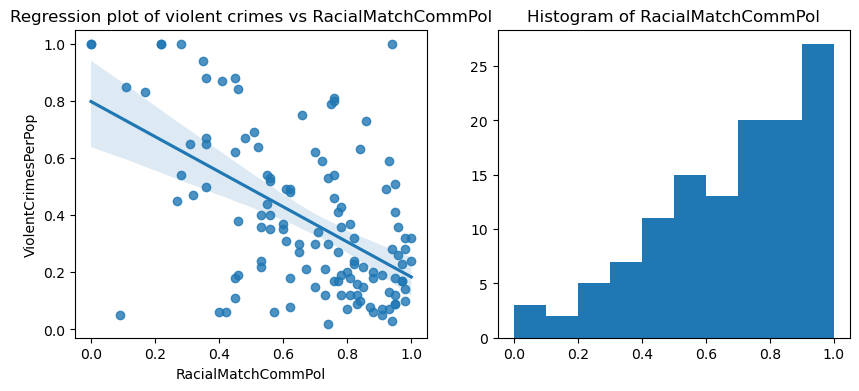

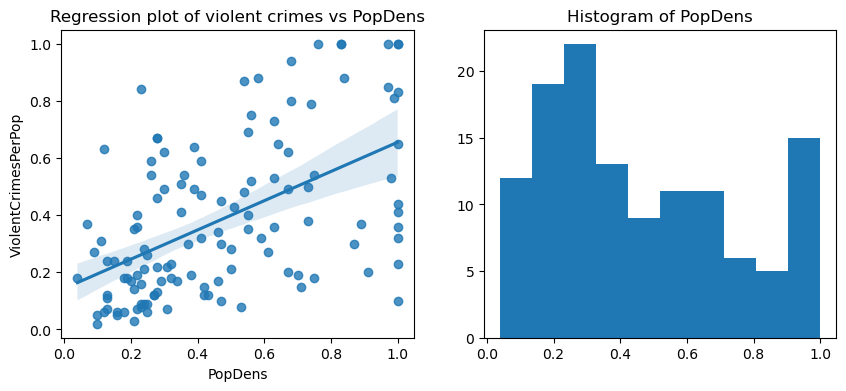

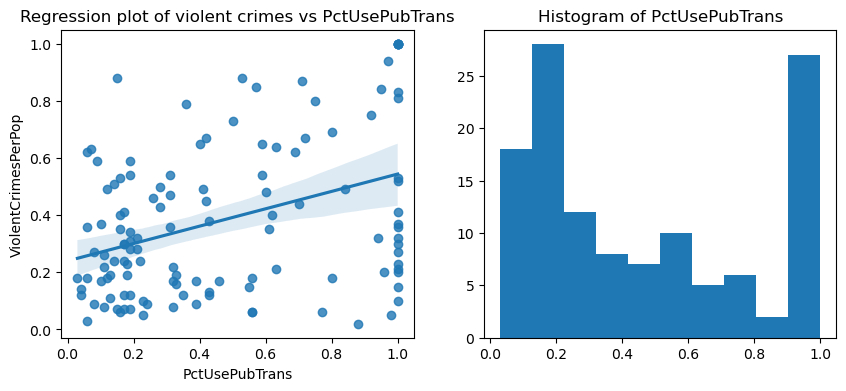

In [36]:
plot_reg_and_hist(cols_interest, target_str) #how each X effects the Y#

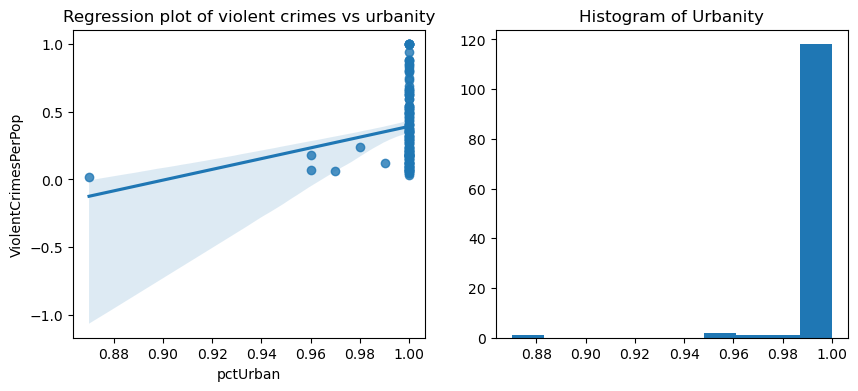

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.regplot(data=data, x='pctUrban', y=target_str, ax=ax[0])
ax[1].hist(data['pctUrban'])  
ax[0].set_title("Regression plot of violent crimes vs urbanity")
ax[1].set_title("Histogram of Urbanity")  
plt.show()  


In [41]:
target_corrs.abs() > 0.5   #see 43

state                  False
county                 False
community              False
fold                   False
population             False
                       ...  
LemasGangUnitDeploy    False
LemasPctOfficDrugUn    False
PolicBudgPerPop        False
ViolentCrimesPerPop     True
PctHomeless            False
Name: ViolentCrimesPerPop, Length: 111, dtype: bool

In [43]:
target_corrs = data.select_dtypes(np.number).corr()[target_str]
target_high_corrs = target_corrs[target_corrs.abs() > 0.5]
target_high_corrs


medIncome             -0.582103
pctWInvInc            -0.762220
pctWPubAsst            0.785465
medFamInc             -0.604126
perCapInc             -0.531540
PctPopUnderPov         0.757973
PctNotHSGrad           0.545719
PctUnemployed          0.757541
PctEmploy             -0.533839
MalePctDivorce         0.658475
MalePctNevMarr         0.568125
FemalePctDiv           0.696501
TotalPctDiv            0.692709
PersPerFam             0.523832
PctFam2Par            -0.850208
PctKids2Par           -0.858912
PctYoungKids2Par      -0.823876
PctTeen2Par           -0.845391
PctIlleg               0.833251
PctLargHouseFam        0.704218
PctLargHouseOccup      0.602976
PctPersOwnOccup       -0.575654
PctPersDenseHous       0.551650
HousVacant             0.503565
PctHousOccup          -0.568671
PctHousOwnOcc         -0.545903
PctVacantBoarded       0.743847
PctHousNoPhone         0.714564
PctWOFullPlumb         0.603673
RacialMatchCommPol    -0.542916
PctPolicWhite         -0.539372
PctPolic

Lets Create a Model

In [45]:
import statsmodels.api as sm

X_simple = data['perCapInc']
X_simple = sm.add_constant(X_simple)
y = data[target_str]


In [46]:
simple_model = sm.OLS(y, X_simple)
results_simple = simple_model.fit()
results_simple.summary()

#rsquare 100 is a perfect fit
#refer to 2:23 in video for explanation of importance


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.283
Model:                             OLS   Adj. R-squared:                  0.277
Method:                  Least Squares   F-statistic:                     47.65
Date:                 Sat, 25 Nov 2023   Prob (F-statistic):           2.52e-10
Time:                         18:25:51   Log-Likelihood:                 6.1898
No. Observations:                  123   AIC:                            -8.380
Df Residuals:                      121   BIC:                            -2.755
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6668      0.046     14.435      0.000       0.575       0.758
perCapInc     -0.8231      0.119     -6.903      0.000      -1.059      -0.587
==============================================================================
Omnibus:                       10.170   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               11.026
Skew:                           0.733   Prob(JB):                      0.00403
Kurtosis:                       2.928   Cond. No.                         6.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multiple Linear Regression

In [49]:
cols_interest  = ['perCapInc', 'PctPopUnderPov', 'PctUnemployed', 'PctNotHSGrad', 'TotalPctDiv', 
                  'PctIlleg', 'PctVacantBoarded', 'PolicPerPop', 'RacialMatchCommPol', 'PopDens']

X = data[cols_interest]
X = sm.add_constant(X)
y = data[target_str]

In [50]:
X

,const,perCapInc,PctPopUnderPov,PctUnemployed,PctNotHSGrad,TotalPctDiv,PctIlleg,PctVacantBoarded,PolicPerPop,RacialMatchCommPol,PopDens
0,1.0,0.29,0.48,0.37,0.38,0.49,0.73,0.79,0.30,0.61,0.39
1,1.0,0.25,0.36,0.33,0.37,0.50,0.26,0.45,0.11,0.84,0.12
2,1.0,0.26,0.43,0.36,0.53,0.52,0.48,0.33,0.19,0.61,0.11
3,1.0,0.21,0.40,0.75,0.89,0.55,0.67,0.39,0.28,0.36,0.73
4,1.0,0.36,0.18,0.30,0.47,0.53,0.27,0.13,0.19,0.98,0.21
...,...,...,...,...,...,...,...,...,...,...,...
118,1.0,0.38,0.14,0.42,0.55,0.40,0.32,0.08,0.33,0.53,0.28
119,1.0,0.34,0.38,0.44,0.55,0.58,0.82,0.77,0.38,0.27,0.47
120,1.0,0.49,0.10,0.20,0.24,0.30,0.11,0.10,0.17,0.80,0.13
121,1.0,0.31,0.31,0.50,0.58,0.52,0.54,0.53,0.30,0.97,0.32


In [51]:
lr_model = sm.OLS(y, X)
results = lr_model.fit()
results .summary()   #refer to 2:26 for explanation of data / importance

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.801
Model:                             OLS   Adj. R-squared:                  0.783
Method:                  Least Squares   F-statistic:                     45.10
Date:                 Sat, 25 Nov 2023   Prob (F-statistic):           1.10e-34
Time:                         18:35:15   Log-Likelihood:                 85.074
No. Observations:                  123   AIC:                            -148.1
Df Residuals:                      112   BIC:                            -117.2
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0830      0.120      0.692      0.490      -0.155       0.321
perCapInc             -0.1494      0.127     -1.173      0.243      -0.402       0.103
PctPopUnderPov        -0.0702      0.146     -0.482      0.631      -0.359       0.218
PctUnemployed          0.5558      0.130      4.279      0.000       0.298       0.813
PctNotHSGrad          -0.3933      0.119     -3.296      0.001      -0.630      -0.157
TotalPctDiv            0.2108      0.123      1.708      0.090      -0.034       0.455
PctIlleg               0.2410      0.098      2.465      0.015       0.047       0.435
PctVacantBoarded       0.1670      0.065      2.554      0.012       0.037       0.297
PolicPerPop            0.2273      0.163      1.397      0.165      -0.095       0.550
RacialMatchCommPol    -0.1458      0.065     -2.253      0.026      -0.274      -0.018
PopDens                0.1110      0.060      1.853      0.066      -0.008       0.230
==============================================================================
Omnibus:                        3.100   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                2.780
Skew:                           0.196   Prob(JB):                        0.249
Kurtosis:                       3.624   Cond. No.                         32.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Diagnostics

Recall the asumptions of multiple linear regression.  they are:

    1. Linearity 
    2. Mormality 
    3. Independence
    4. Homoeskedastricty 
    5. No mulitcollinearity 
    
    

Checking Normality 

#### CHECKING ASSUMPTIONS

In [52]:
residuals = results.resid

In [2]:
residuals

NameError: name 'residuals' is not defined

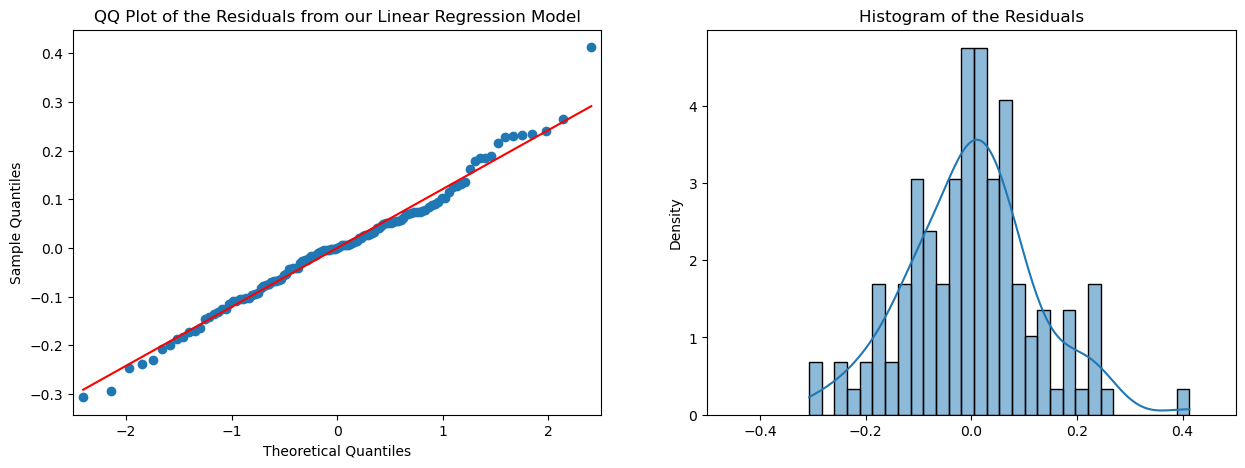

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sm.qqplot(residuals, line='s', ax=ax[0])
ax[0].set_title("QQ Plot of the Residuals from our Linear Regression Model")
sns.histplot(residuals, bins=30, stat='density', kde=True, ax=ax[1])
ax[1].set_title("Histoboxgram of the Residuals")
ax[1].set_xlim(-0.5, 0.5)
plt.show()


In [62]:
from scipy import stats
stats.shapiro(residuals).pvalue


0.3146819472312927

Testing Independence of Residuals

In [64]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(residuals)


2.0797516315543896

#### Testing Homeskedasticity

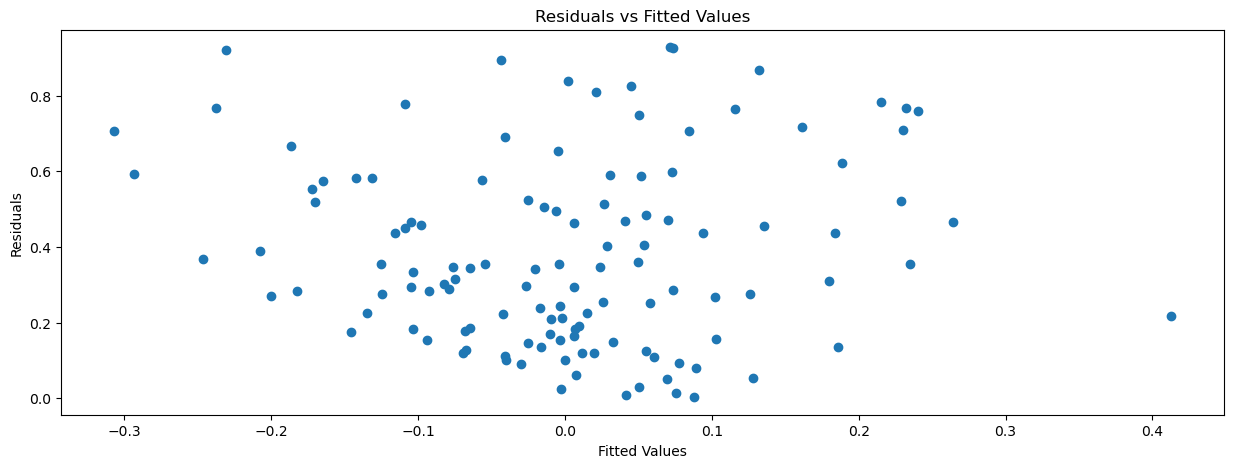

In [68]:
y_hat = results.fittedvalues 

fig, ax = plt.subplots(1,1, figsize = (15,5))
                                               
ax.scatter(residuals, y_hat)
plt.title("Residuals vs Fitted Values")
plt.ylabel ("Residuals")
plt.xlabel("Fitted Values")
plt.show()
                        

#### Testing Multicollinearity

The variannce inflation factor is a quantiy qhich increase the standard errors of the betas

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
#from statsmodels.tools import add_constant
vifs = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
vifs = pd.DataFrame(vifs)
vifs.columns = ['Variance inflation Facotr']
vifs 


,Variance inflation Facotr
const,109.681841
perCapInc,3.811545
PctPopUnderPov,6.525784
PctUnemployed,5.309327
PctNotHSGrad,3.824734
TotalPctDiv,2.950744
PctIlleg,7.321490
PctVacantBoarded,2.954399
PolicPerPop,1.899931
RacialMatchCommPol,1.844865


If VIF is greater than 10, you have high multicollinearity